# Problem 3: Feedforward Inhibition Model

J=2, RT=0.56, Decision=2


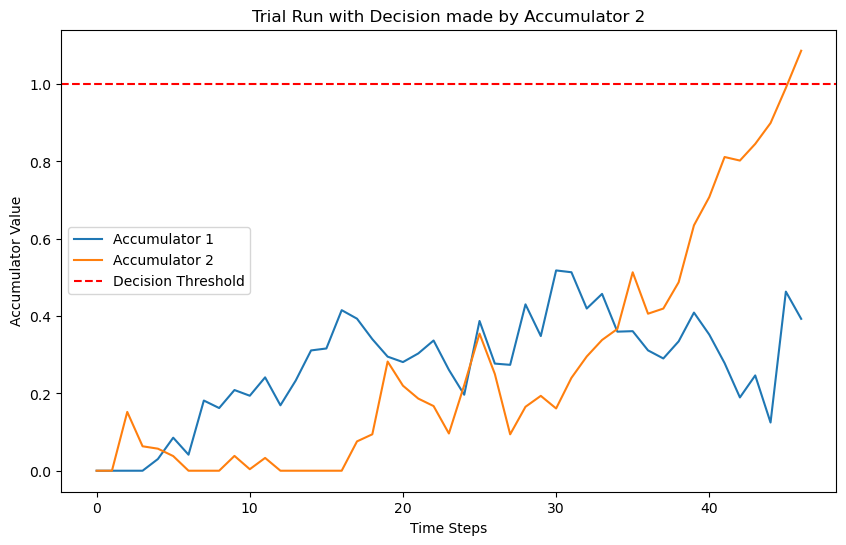

J=3, RT=0.43000000000000005, Decision=3


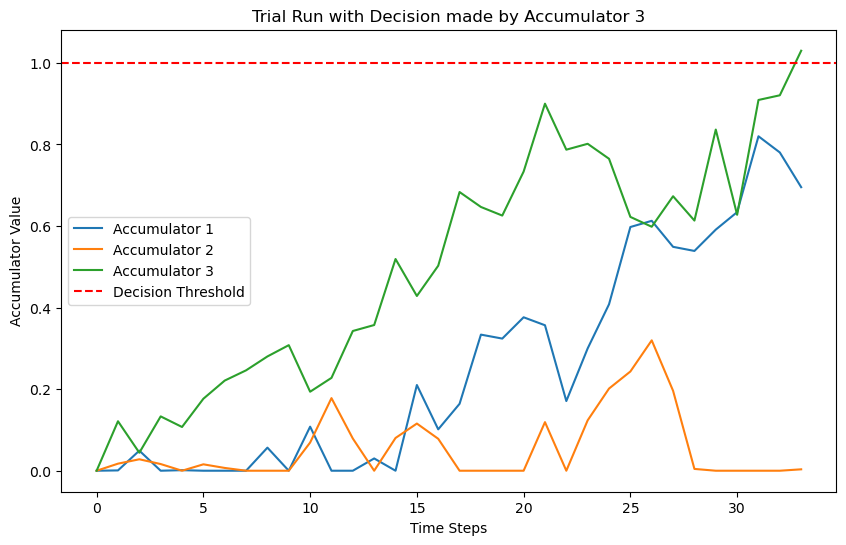

J=4, RT=0.58, Decision=3


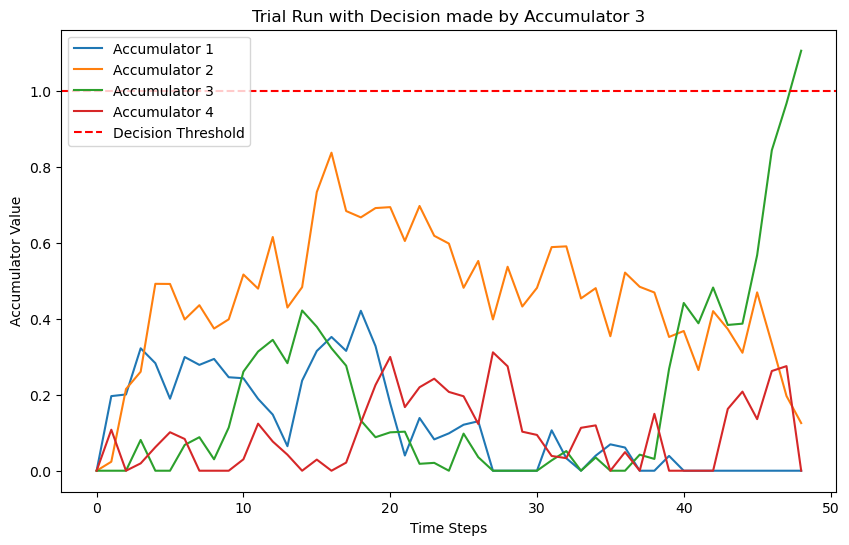

Decision time: 0.36, Decision: 1
J=2, RT=0.21, Decision=1


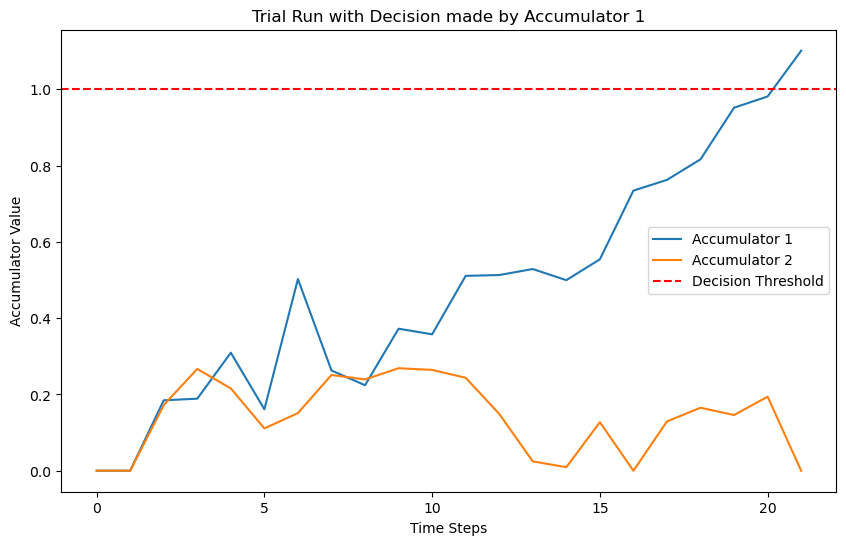

J=3, RT=1.07, Decision=1


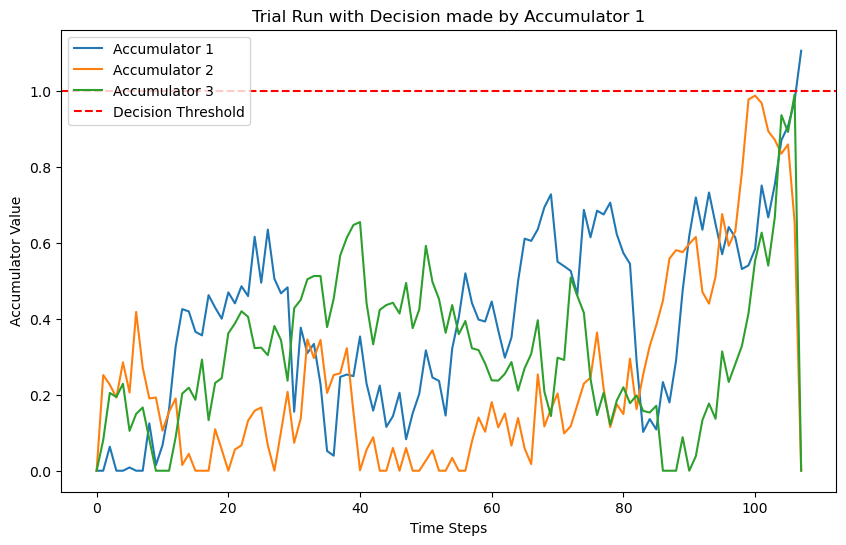

J=4, RT=0.32, Decision=4


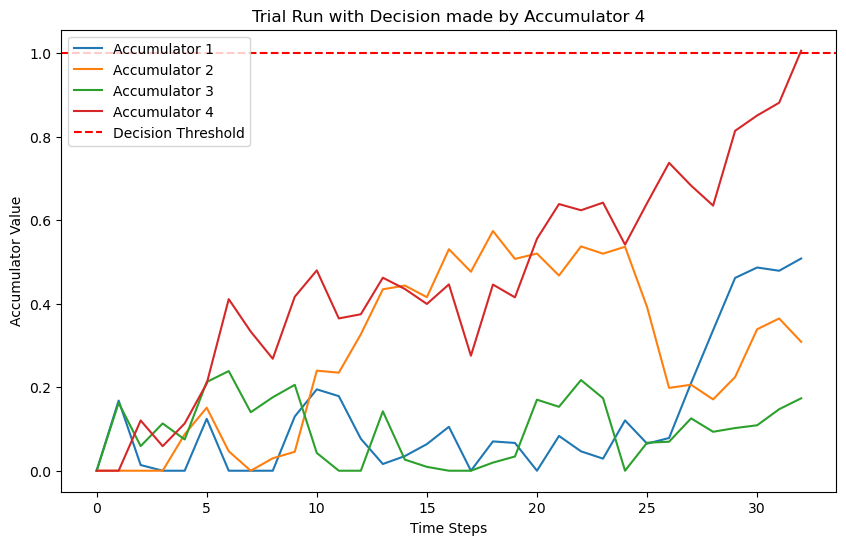

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

# Parameters for demonstration
J_values = [2, 3, 4]  # Different numbers of alternatives to simulate
v = np.array([0.5, 0.6, 0.7, 0.8])  # Drift rates, adjust length as needed
alpha = 0.1  # Feedforward inhibition strength
sigma = 1.0  # Scale coefficient, typically set to 1
a = 1.0  # Decision threshold
tau = 0.1  # Non-decision time
x0 = np.zeros(max(J_values))  # Starting points for each accumulator
dt = 0.01  # Time step
total_time = 10.0  # Total simulation time per trial

# Feedforward inhibition function
def If(v, alpha, i):
    return alpha * np.sum(np.delete(v, i))

# Euler-Maruyama method to simulate one trial
def simulate_trial(J, v, alpha, sigma, a, x0, dt, total_time):
    time = np.arange(0, total_time, dt)
    X = np.zeros((len(time), J))
    X[0, :] = x0
    for t in range(1, len(time)):
        for i in range(J):
            dXi = (v[i] - If(v, alpha, i)) * dt + sigma * np.sqrt(dt) * np.random.randn()
            X[t, i] = max(X[t-1, i] + dXi, 0)
            if X[t, i] >= a:
                return time[t] + tau, X[:t+1, :], i  # Return RT, process, decision
    return None, None, None  # No decision reached within the time limit

# Visualization function
def plot_trial(J, X, decision):
    plt.figure(figsize=(10, 6))
    for i in range(J):
        plt.plot(X[:, i], label=f'Accumulator {i+1}')
    plt.axhline(y=a, color='r', linestyle='--', label='Decision Threshold')
    plt.xlabel('Time Steps')
    plt.ylabel('Accumulator Value')
    plt.title(f'Trial Run with Decision made by Accumulator {decision+1}')
    plt.legend()
    plt.show()

# Simulation and visualization for different numbers of alternatives
for J in J_values:
    RT, X, decision = simulate_trial(J, v[:J], alpha, sigma, a, x0[:J], dt, total_time)
    if RT is not None:
        print(f"J={J}, RT={RT}, Decision={decision+1}")
        plot_trial(J, X, decision)


################## Numba version #######################
# Numba JIT 
@jit(nopython=True)
def If(v, alpha, i):
    total = 0.0
    for j in range(len(v)):
        if j != i:
            total += v[j]
    return alpha * total

@jit(nopython=True)
def simulate_trial(J, v, alpha, sigma, a, x0, dt, total_time):
    time = np.arange(0, total_time, dt)
    X = np.zeros((len(time), J))
    X[0, :] = x0
    for t in range(1, len(time)):
        for i in range(J):
            dXi = (v[i] - If(v, alpha, i)) * dt + sigma * np.sqrt(dt) * np.random.randn()
            X[t, i] = max(X[t-1, i] + dXi, 0)
            if X[t, i] >= a:
                return time[t], X[:t+1, :], i  # 返回决策时间，过程数据和决策
    return None, None, None  # 在时间限制内没有做出决策



RT, X, decision = simulate_trial(J, v, alpha, sigma, a, x0, dt, total_time)
if RT is not None:
    print(f"Decision time: {RT}, Decision: {decision+1}")

# Visualization function
def plot_trial(J, X, decision):
    plt.figure(figsize=(10, 6))
    for i in range(J):
        plt.plot(X[:, i], label=f'Accumulator {i+1}')
    plt.axhline(y=a, color='r', linestyle='--', label='Decision Threshold')
    plt.xlabel('Time Steps')
    plt.ylabel('Accumulator Value')
    plt.title(f'Trial Run with Decision made by Accumulator {decision+1}')
    plt.legend()
    plt.show()

# Simulation and visualization for different numbers of alternatives
for J in J_values:
    RT, X, decision = simulate_trial(J, v[:J], alpha, sigma, a, x0[:J], dt, total_time)
    if RT is not None:
        print(f"J={J}, RT={RT}, Decision={decision+1}")
        plot_trial(J, X, decision)
